# Insurance Cost with Linear Regression

In this notebook we will try to predict the charges to the insurance policyholders. We will analyze all relevant data for the health insurance of a group of insurance policies and we will develop focused amount charge model.

First we will import the relevant libraries that we will use for the given task.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Insurance Cost data.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

We can see that the dataframe has 1338 rows and 7 columns, and we can confirm that there aren't missing values in the data set.

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Age distribution

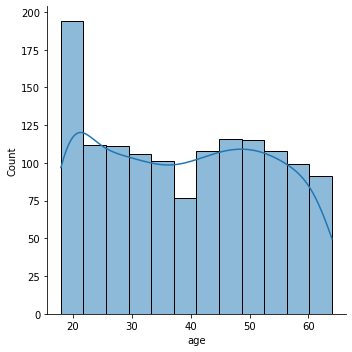

In [8]:
sns.displot(df['age'], kde = True)

<AxesSubplot:xlabel='sex', ylabel='age'>

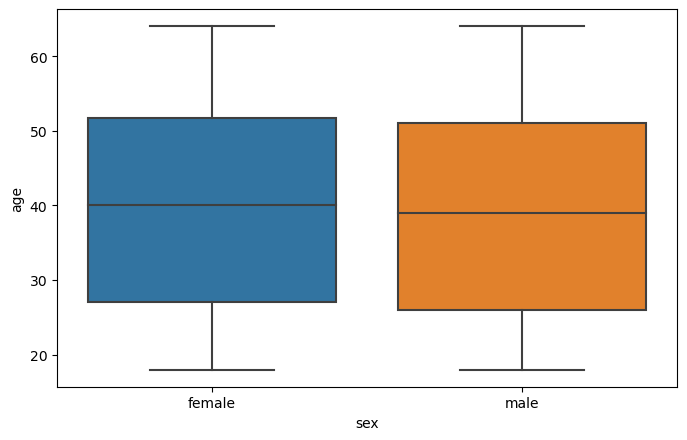

In [9]:
fig= plt.figure(figsize=(8,5), dpi = 100)
sns.boxplot(x='sex',y='age',data=df)

C:\Users\Simka\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Simka\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of ages of female')

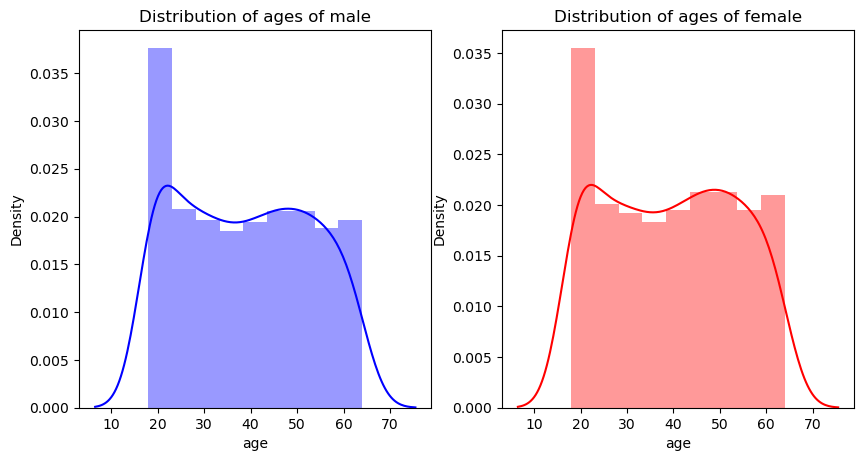

In [10]:
fig= plt.figure(figsize=(10,5), dpi = 100)

ax=fig.add_subplot(121)
sns.distplot(df[(df['sex'] == 'male')]["age"],color='b',ax=ax)
ax.set_title('Distribution of ages of male')

ax=fig.add_subplot(122)
sns.distplot(df[(df['sex'] == 'female')]['age'],color='r',ax=ax)
ax.set_title('Distribution of ages of female')

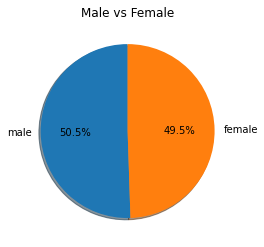

In [11]:
fig, ax = plt.subplots()

sex_names= df.sex.value_counts().index
sex_percent = df.sex.value_counts().values


ax.set_title("Male vs Female")
ax.pie(sex_percent, labels=sex_names, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

# Age distribution of Smoker vs Non-Smoker

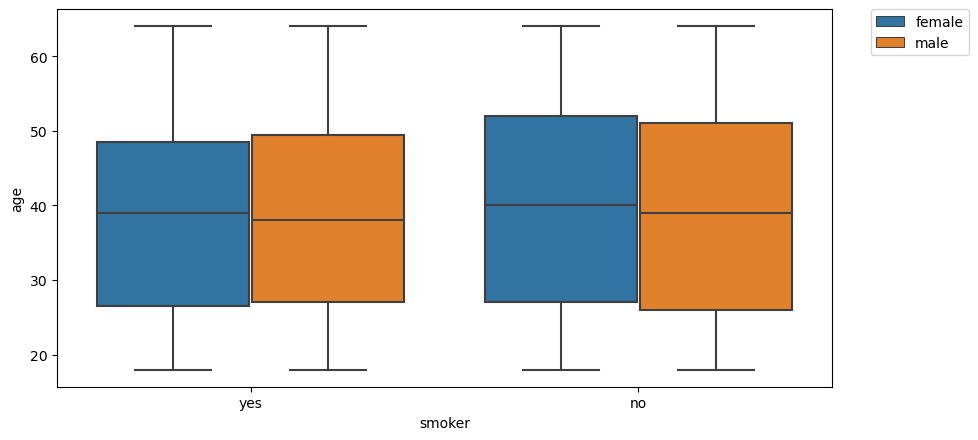

In [12]:
plt.figure(figsize=(10,5),dpi=100)
sns.boxplot(x='smoker',y='age',data=df, hue = 'sex')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Text(0.5, 1.0, 'Distribution of ages of non smoker')

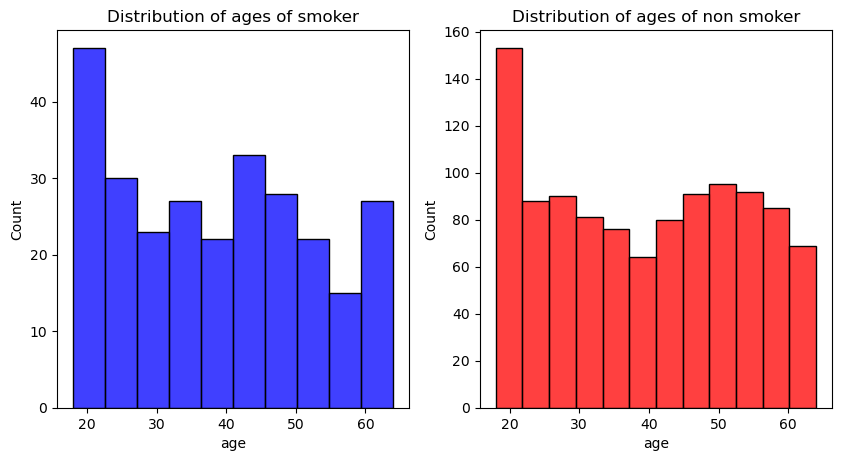

In [13]:
fig= plt.figure(figsize=(10,5), dpi =100)

ax=fig.add_subplot(121)
sns.histplot(df[df['smoker'] == 'yes']["age"],color='b',ax=ax)
ax.set_title('Distribution of ages of smoker')

ax=fig.add_subplot(122)
sns.histplot(df[df['smoker'] == 'no']['age'],color='r',ax=ax)
ax.set_title('Distribution of ages of non smoker')

As you can see there is slight change in distribution of smoker and non smoker and also we can see there is some interesting spike in % of age group between 18-22.

Text(0.5, 1.0, 'Smokers count by gender')

<Figure size 1200x500 with 0 Axes>

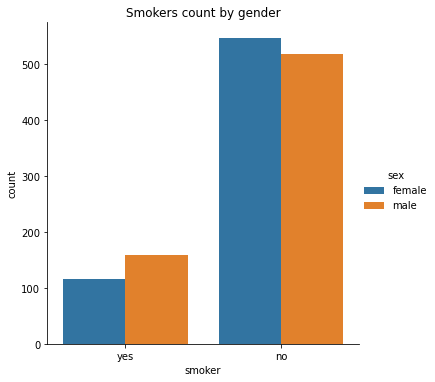

In [14]:
fig= plt.figure(figsize=(12,5), dpi =100)
sns.catplot(x="smoker", kind="count",hue = 'sex',data=df)
plt.title('Smokers count by gender')


# BMI Distribution

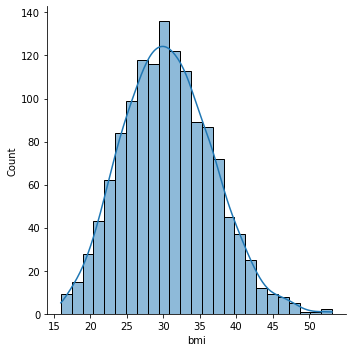

In [15]:
sns.displot(df['bmi'], kde = True)

C:\Users\Simka\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Simka\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of bmi of female')

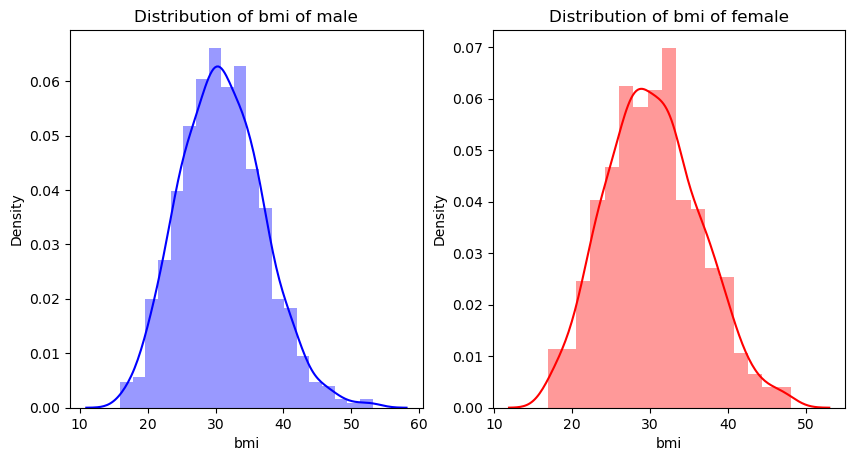

In [16]:
fig= plt.figure(figsize=(10,5), dpi = 100)

ax=fig.add_subplot(121)
sns.distplot(df[(df['sex'] == 'male')]["bmi"],color='b',ax=ax)
ax.set_title('Distribution of bmi of male')

ax=fig.add_subplot(122)
sns.distplot(df[(df['sex'] == 'female')]['bmi'],color='r',ax=ax)
ax.set_title('Distribution of bmi of female')

C:\Users\Simka\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Simka\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of bmi of non smoker')

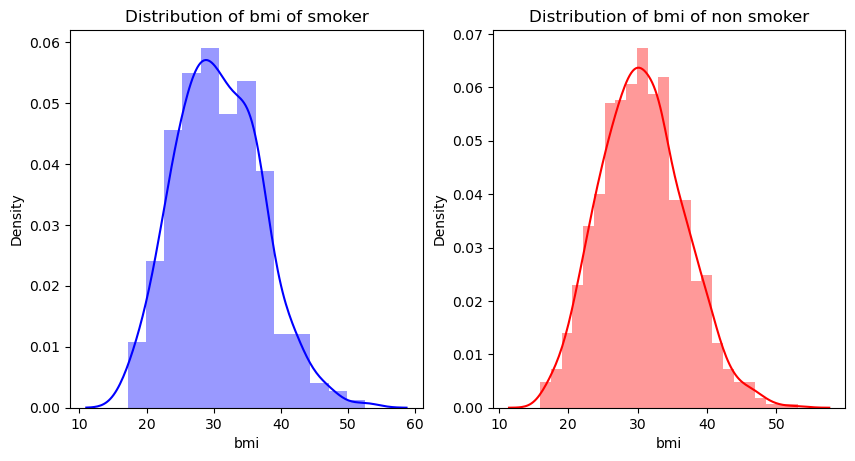

In [17]:
fig= plt.figure(figsize=(10,5), dpi =100)

ax=fig.add_subplot(121)
sns.distplot(df[df['smoker'] == 'yes']["bmi"],color='b',ax=ax)
ax.set_title('Distribution of bmi of smoker')

ax=fig.add_subplot(122)
sns.distplot(df[df['smoker'] == 'no']['bmi'],color='r',ax=ax)
ax.set_title('Distribution of bmi of non smoker')

In [18]:
#normaly distributied

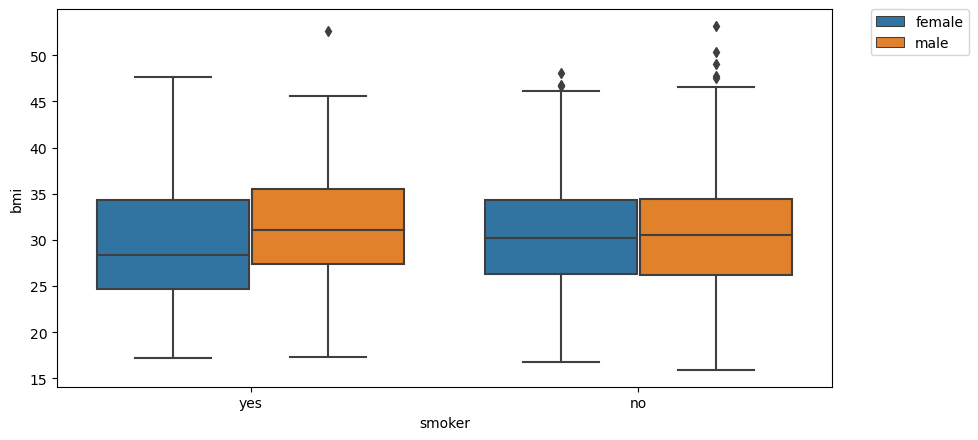

In [19]:
plt.figure(figsize=(10,5),dpi=100)
sns.boxplot(x='smoker',y='bmi',data=df, hue = 'sex')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [20]:
#have some outliers

In [21]:
df[(df['bmi'] > 50) & (df['sex'] == 'male')]

,age,sex,bmi,children,smoker,region,charges
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


In [22]:
df[(df['bmi'] > 47) & (df['sex'] == 'female')]

,age,sex,bmi,children,smoker,region,charges
286,46,female,48.07,2,no,northeast,9432.92530
543,54,female,47.41,0,yes,southeast,63770.42801
860,37,female,47.60,2,yes,southwest,46113.51100


In [23]:
df[['bmi','sex']].max()

bmi    53.13
sex     male
dtype: object

<AxesSubplot:xlabel='bmi', ylabel='charges'>

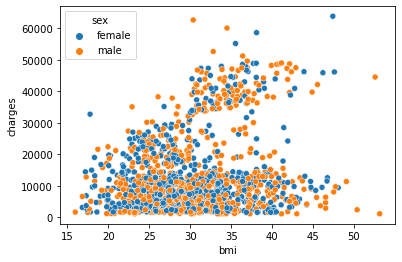

In [24]:
sns.scatterplot(x='bmi',y='charges',data=df, hue = 'sex')

We can drop from our dataset rows were sex is male and bmi is higher than 50.

In [25]:
df =df.drop([847,1047,1317], axis = 0)

<AxesSubplot:xlabel='bmi', ylabel='charges'>

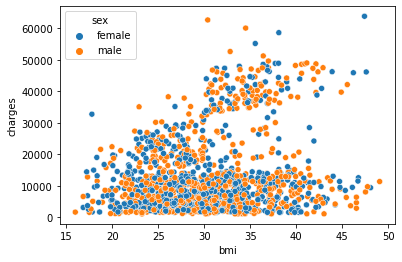

In [26]:
sns.scatterplot(x='bmi',y='charges',data=df, hue = 'sex')

From the scatterplot we can see that homoscedasticity is present, we can try to remove by applying natrual log to the dependet or the independet variable.

Text(0.5, 1.0, 'Distribution of Charges')

<Figure size 1000x500 with 0 Axes>

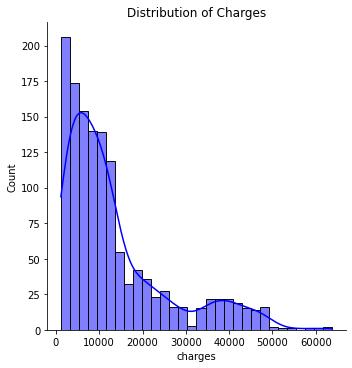

In [27]:
plt.figure(figsize=(10,5),dpi=100)
sns.displot(df['charges'], kde = True, color = 'b')
plt.title('Distribution of Charges')

This distribution is right-skewed. To make it closer to normal we can apply natural log.

In [28]:
df['charges_log'] = np.log10(df['charges'])

Text(0.5, 1.0, 'Distribution of Charges_log')

<Figure size 1000x500 with 0 Axes>

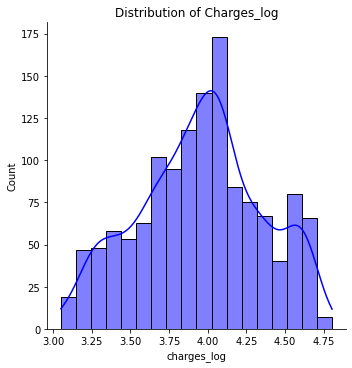

In [29]:
plt.figure(figsize=(10,5),dpi=100)
sns.displot(df['charges_log'], kde = True, color = 'b')
plt.title('Distribution of Charges_log')

<AxesSubplot:xlabel='bmi', ylabel='charges_log'>

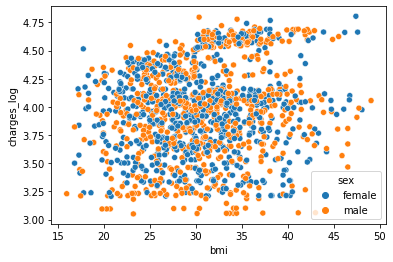

In [30]:
sns.scatterplot(x='bmi',y='charges_log',data=df, hue = 'sex')

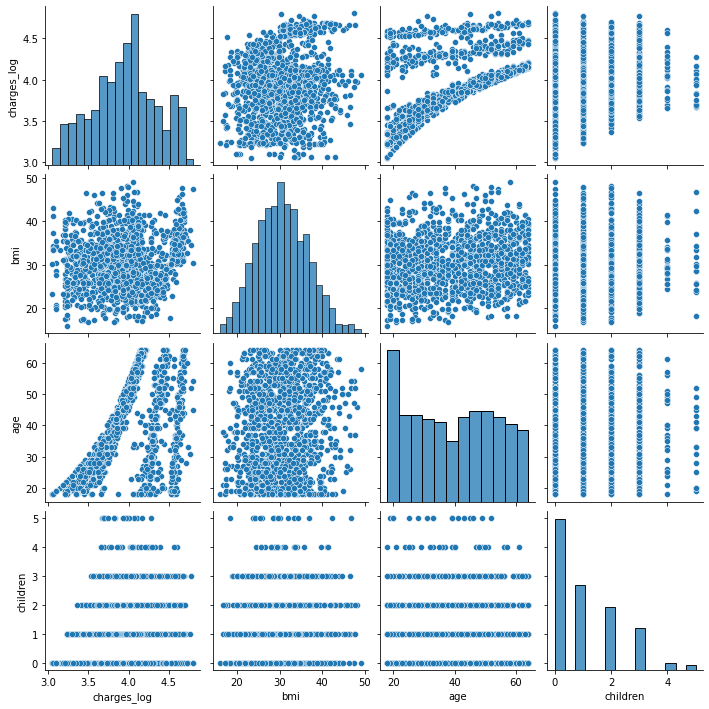

In [31]:
sns.pairplot(df[['charges_log', 'bmi', 'age', 'children']])

In [32]:
df.corr()['charges_log']

age            0.528688
bmi            0.139987
children       0.160497
charges        0.893146
charges_log    1.000000
Name: charges_log, dtype: float64

We can see that charges have strong correlation with feature age.

In [33]:
df_log = df.drop('charges', axis =1)

<AxesSubplot:>

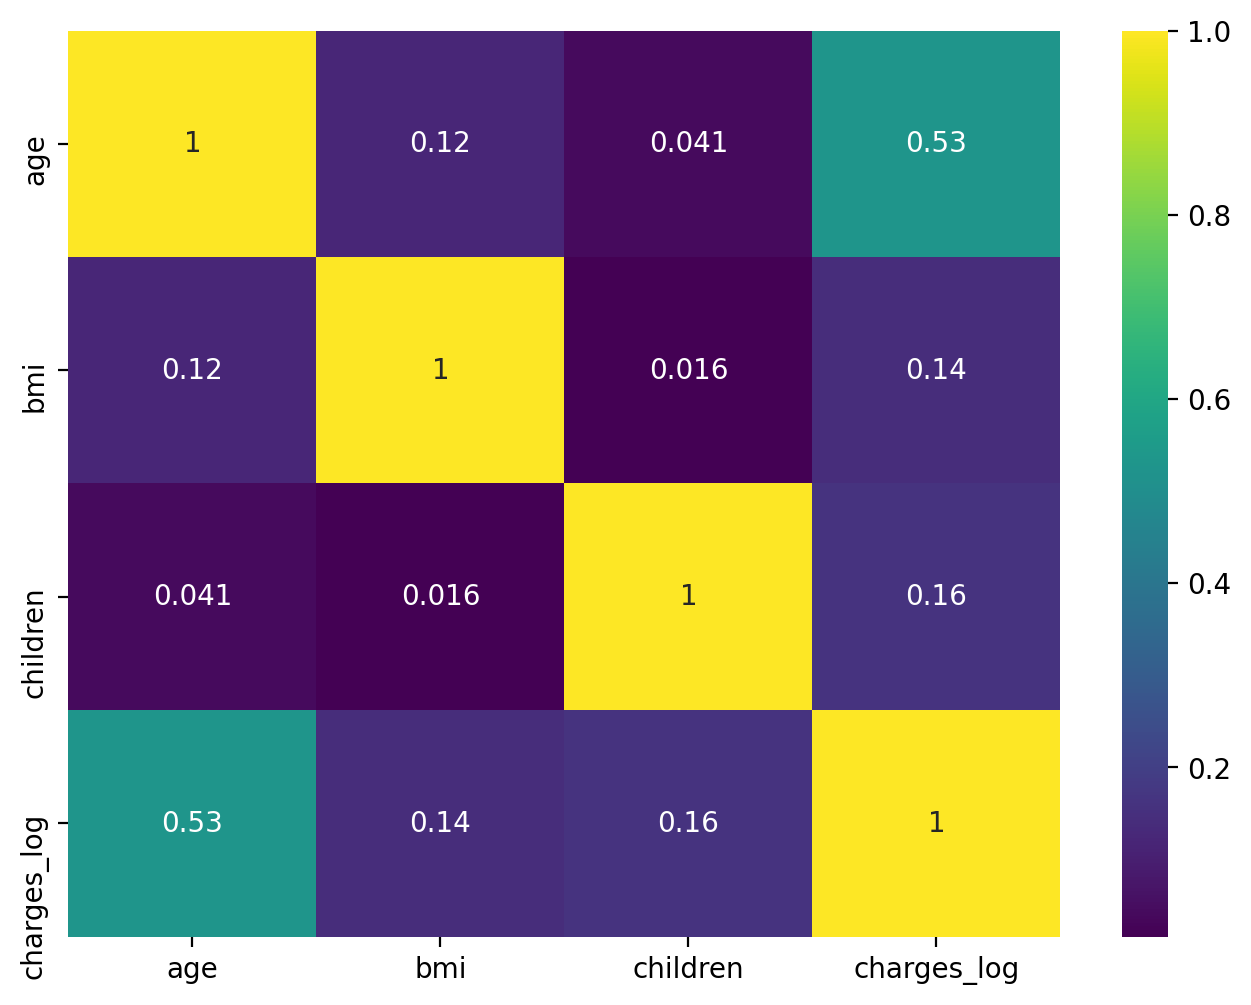

In [34]:
plt.figure (figsize = (8,6), dpi=200)
sns.heatmap(df_log.corr(),cmap='viridis', annot=True)

From the heatmap we can confirm that there is no multicolinearity between the independet features.

# Charges by region

<AxesSubplot:xlabel='charges', ylabel='region'>

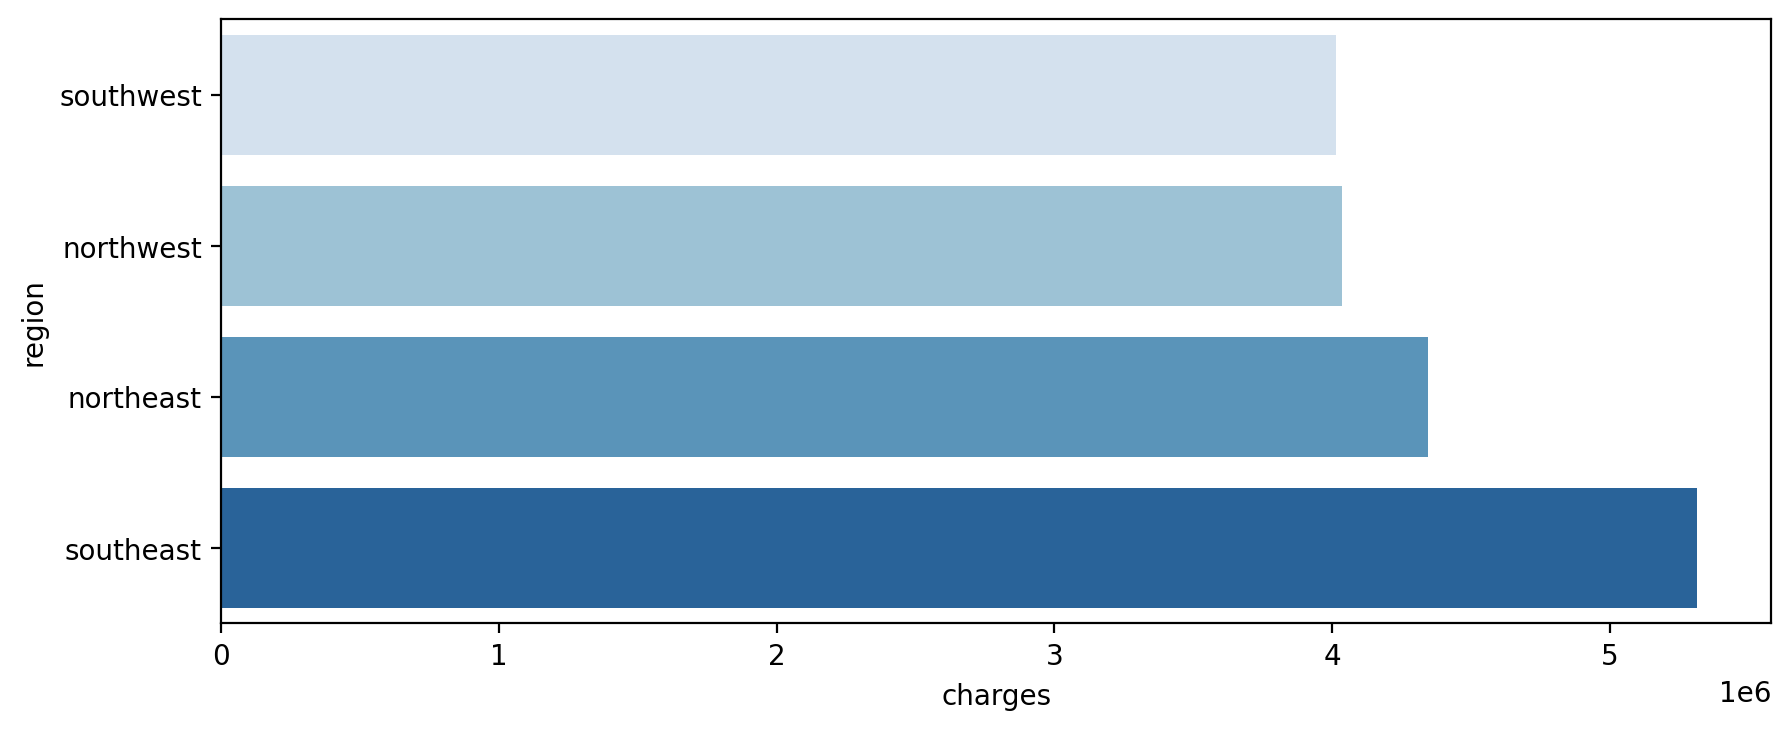

In [39]:
plt.figure (figsize = (10,4), dpi=200)
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)

sns.barplot(x =charges.head(), y=charges.head().index, palette='Blues')

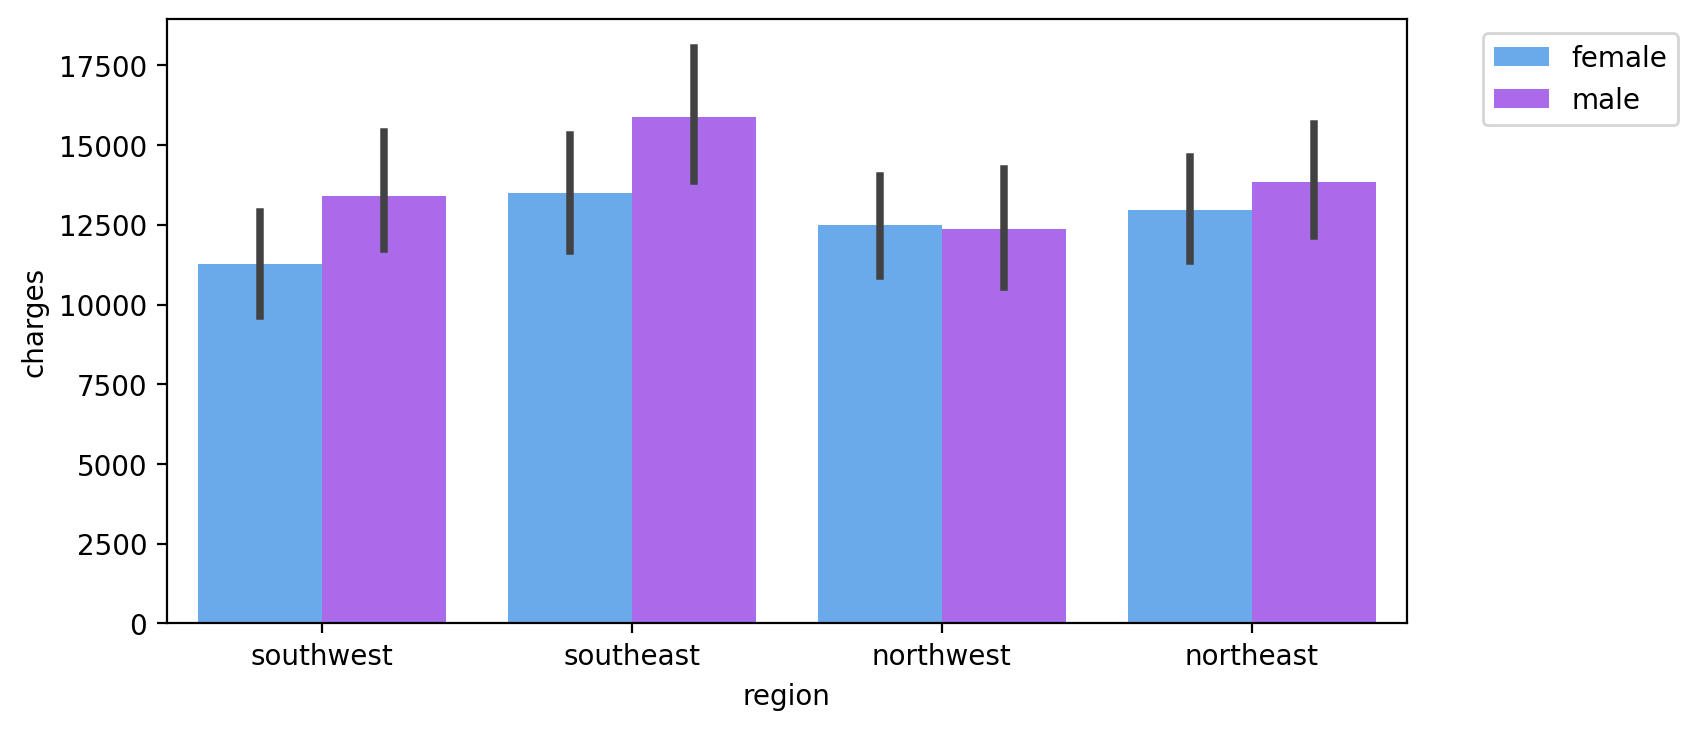

In [41]:
plt.figure (figsize = (8,4), dpi=200)
sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')
plt.legend(bbox_to_anchor=(1.05, 1))

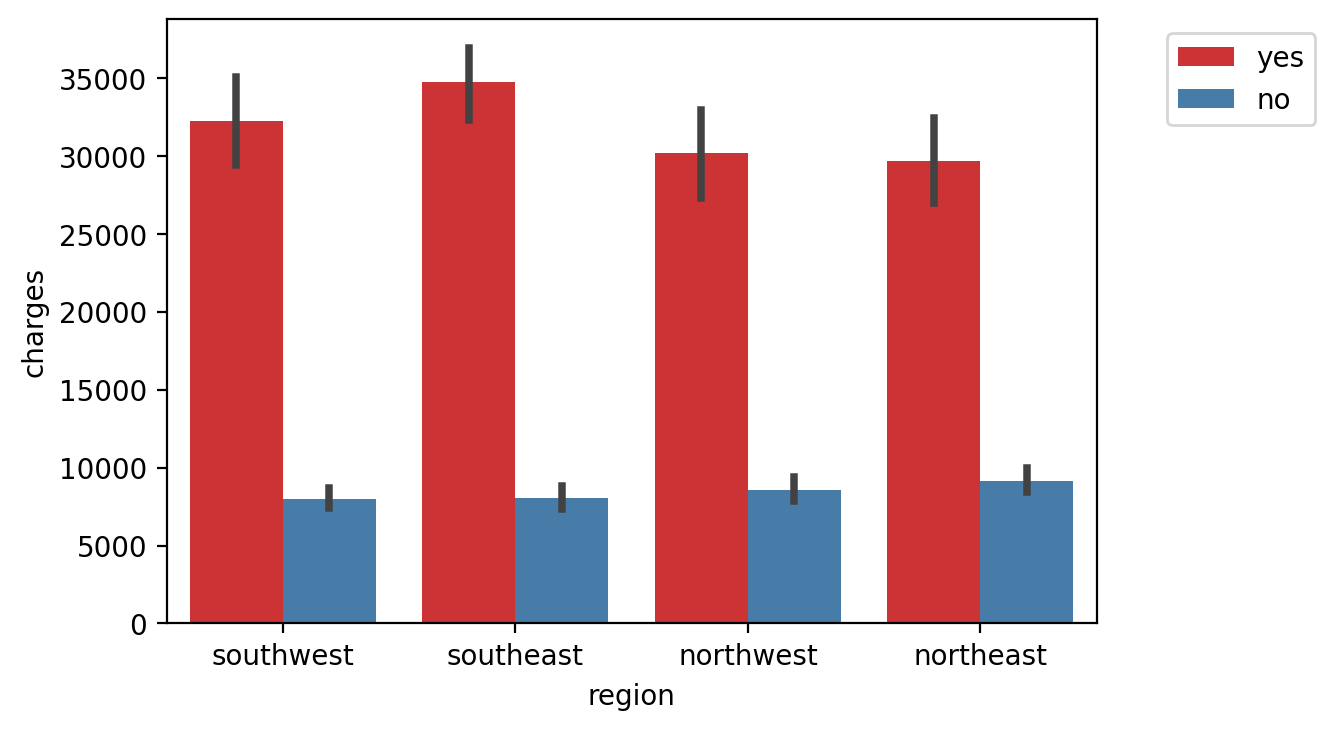

In [45]:
plt.figure (figsize =(6,4), dpi=200)
sns.barplot(x = 'region', y = 'charges', hue='smoker', data=df, palette='Set1')
plt.legend(bbox_to_anchor=(1.25, 1))

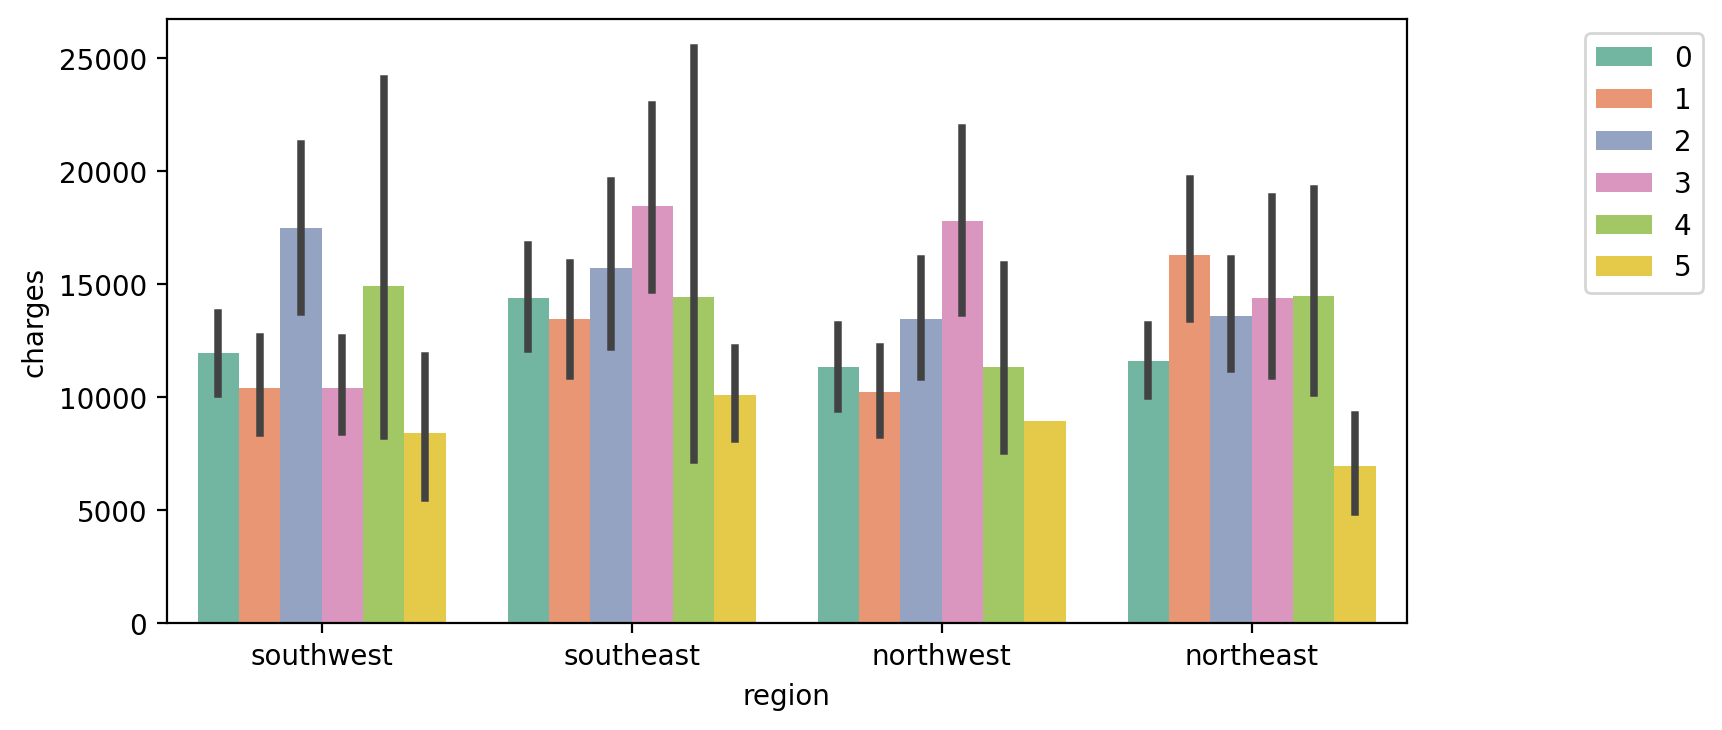

In [47]:
plt.figure (figsize =(8,4), dpi=200)
sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set2')
plt.legend(bbox_to_anchor=(1.25, 1))

As we can see from these barplots the highest charges due to smoking are still in the Southeast but the lowest are in the Northeast. People in the Southwest generally smoke more than people in the Northeast, but people in the Northeast have higher charges by gender than in the Southwest and Northwest overall. And people with children tend to have higher medical costs overall as well.

# Create dummy variables

In [48]:
df_nums = df_log.select_dtypes(exclude='object')
df_objs = df_log.select_dtypes(include='object')

In [49]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [50]:
df_final = pd.concat([df_nums,df_objs],axis=1)

In [51]:
df_final.head()

,age,bmi,children,charges_log,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,4.227499,0,1,0,0,1
1,18,33.770,1,3.236928,1,0,0,1,0
2,28,33.000,3,3.648308,1,0,0,1,0
3,33,22.705,0,4.342116,1,0,1,0,0
4,32,28.880,0,3.587358,1,0,1,0,0


# Create training and testing sets

In [52]:
X = df_final.drop('charges_log',axis=1)
y = df_final['charges_log']

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(scaled_X_train,y_train)

LinearRegression()

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
print('R-squared score (training): {:.3f}'
     .format(linear_reg_model.score(scaled_X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linear_reg_model.score(scaled_X_test, y_test)))

R-squared score (training): 0.763
R-squared score (test): 0.778


In [59]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(linear_reg_model,scaled_X_train,y_train,
                         scoring='r2',cv=10)
scores.mean()

0.7524739642526457